# <font color = "0061c7"> Naïve Bayes </font>

**Prof. Dr. Juanjo Manjarín**

**IEXL Data Science Bootcamp**

**Bootcamp in Data Science**

---



This is a probabilistic classifier mainly used when the size of the training set is small. The idea is to find the conditional probability that an observation belongs to a category if some other data are known. For this, the main task is the Bayes' Theorem with some extra assumptions, so let's review it.

## <font color = "4587cd"> Bayes' Formula </font>

Before going into the classification problem, let's explain what Bayes' formula is since it is a key result in probability theory and, depending on the interpretation it can be a formula, a corolary or a theorem, but one has to be careful since in some situations it may be even not appliable. The reasons for this annomalous behaviour are manifold and out of the scope of these lectures.

Suppose we have two events $A$ and $B$, each of them taking any set of possible values under the condition that they are not independent, i.e.

\begin{equation}
P(A|B)\neq P(A)
\end{equation}

then, using the definition of the conditional probability as the ratio beween the probability of the intersection and the total probability of the condtion

\begin{equation}
p(A|B)=\frac{P(A\cap B)}{P(B)}
\end{equation}

and solving for the intersection, one can easily see that

\begin{equation}
P(A|B)=P(A)\,\frac{P(B|A)}{P(B)}
\end{equation}

which is known as the **Bayes' Formula**. Which is in perfect agreement with the non-independency we postulated and which says that the probability of $A$ if $B$ is proportional to the probability of $A$. 

As a side comment, also related with the association rules, one must be careful with the conditional probability and not confuse it with the probability of a conditional. In general $P(A|B)\neq P(B\to A)$, since the second is the probability that *if $B$ then $A$* while the first is the probability of "$A$" if $B$.


## <font color = "4587cd"> The Bayes Classifier </font>

Remember that the Statistical Decision Theory is based on the idea that for any model we may build, the expected error of our prediction is as small as possible, i.e. the predicted value from the model is as close to the true value as possible. In order to fulfill this condition we minimize the **expected prediction error**, $EPE$, defined as the expected value of the **loss function**, $L(y,f(x))$, which penalizes the prediction errors. 

Depending on the type of variables and the context of the problem we will choose different loss functions. Then, for example, if the model is for a numerical continuous variable and we use as loss function the useual Euclidean distance, i.e. the square of the difference between the true value and the predicted value, then the model we obtain is that of a linear regression.

In the case we want to study now, the response variable is a discrete variable, the simplest possible case is that of a binary variable. Given that we use 1 and 0 to describe the two possible states of the variable, once we predict there are two possibilities only: we are right or wrong, nothing inbetween. Therefore, the most natural choice of the loss function is the **zero-one loss function**

\begin{equation}
L(y,\hat y(x)) = \begin{pmatrix} L(1,1) & L(1,2) & \dots & L(1,n) \\ 
        L(2,1) & L(2,2) & \dots & L(2,n) \\ 
        \vdots & \vdots & \ddots & \vdots \\ 
        L(n,1) & L(n,2) & \dots & L(n,n) \end{pmatrix} = 
            \begin{pmatrix} 0 & 1 & \dots & 1 \\ 
            1 & 0 & \dots & 1 \\ 
            \vdots & \vdots & \ddots & \vdots \\ 
            1 & 1 & \dots & 0 
            \end{pmatrix}
\end{equation}

which means that the penalty when prediction and true value are equal is zero and one otherwise. Then we can write the EPE as

\begin{equation}
EPE =E\left[ L(y,\hat y(x))\right] = \sum_x \left[1 - P(\hat y(x) | x)\right] 
\end{equation}

Now, since we want this value to be as minimum as possible, we turn this into an optimization problem. However, we do not need a global solution, but something that works for each observation, then pointwise minimization is enough. This yields as result the following model

\begin{equation}
\hat y(x) = argmin(1- P(\hat y(x)|x)) = argmax (P(y|x))
\end{equation}

This model is the **Bayes Classifier**. Now, how do we interpret this equation? First we have to read the equation, it says that the predicted category (values of $y$) will be that whose conditional probability on all the independent variables is maximum.

This makes perfect sense: suppose the response is the binary variable female/not-female, and we are using a sample in which we have different properties of each observation: height, weight, foot-size and age (some of them may be relevant and some others not). Then we find the model and then want to apply it to any other dataset. Then we are interested in knowing if each of those observations is female or not-female based on their individual properties. The classifier says that we will assign each observation to one category depedending on which conditional probability is higher.

How do we find each of these conditional probabilities? With the Bayes' theorem, then

\begin{equation}
P(y|\cap_i x_i)=\frac{P(\cap_i x_i|y)\,P(y)}{P(\cap_i x_i)}
\end{equation}

where and the only quantity we have to compute is the right hand side of the equation, which will always be available from any data set we may have (as long as we are in a supervised learning case).

### <font color = "red"> The Naïve Bayes Classifier </font>

In the computation of the right-hand side of the previous equation, we find a major problem in $P(\cap x_i|y)$ since if we take it as the full joint distribution it is something impossible to compute as soon as the number of variables involved in high. On the other hand, we can make one simplification by assuming that all the explanatory variables are independent among themselves. This is something that is obviously not true, i.e. using the the example before, it is clear that, for example, weight and height of one person are not independent quantities.

Under this assumption we gain computation power, since now the probabilities are easily computed. However, even though by the end of the day, the classification we make is not bad, this cannot be used as an estimator of the probabilities. This approximation leads to

\begin{equation}
P(\cap_i x_i|y) =  \prod_iP(x_i|y)
\end{equation}

and then we cna write the Bayes' formula as

\begin{equation}
P(y|\cap_i x_i)=P(y)\frac{\prod_i P(x_i|y)}{P(x)}
\end{equation}

Since the denominator in the right hand side is going to be the same for all the different categories it is irrelevant for the classification itself. This model is known as the **Naïve Bayes Classifier**. Now, there are two main ideas to consider:

 * In the computation of the classifier is that we have to assume a model for each of the conditional probabilities $P(x_i|y)$, then if we have a numerical variable, we may use a normal distribution or an exponential while if it is a categorical we may find a binomial, multinomial, hypergeometric or any other model that may fit to the case at hand. 

 * The values we compute may be greater than one and that would be perfectly right, since we are working with *density* probabilities, not with probabilities themselves.
 


## <font color = "4587cd"> Naïve Bayes in Python </font>

Let's use the `scikit-learn` module to find the Naïve Bayes classifier for one problem. As usual let's load all the modules we need before any other step. Note that we are loading many of the `sklearn` functions.

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('seaborn')
rcParams['figure.figsize'] = 15, 6

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score 
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.model_selection import learning_curve, ShuffleSplit, validation_curve

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from scikit-learn we are importing the Gaussian Naïve Bayes, which is the one we have just commented for numerical continuous variables, the train_test_split function will allow us to split the dataset into train and test sets and finally the metrics module contains different functions to compute the different metrics that will let us evaluate how good is our model.

Let's create a random set using normal distributions for females and not-females using values of a supposedly normally distributed population of weights and heights (a real dataset will most probably deviate from normality in the weights mostly)

In [ ]:
np.random.seed(101)

d1 = pd.DataFrame({'height': np.random.normal(1.74, 0.076, 500),
                   'weight': np.random.normal(79.9, 4.3, 500),
                   'female': ['0']*500})

d2 = pd.DataFrame({'height': np.random.normal(1.63, 0.082, 500),
                   'weight': np.random.normal(64, 5.1, 500),
                   'female': ['1']*500})

dataset = pd.concat([d1, d2])

In order to see the distribution of the data we can make a scatterplot using the **female** variable to determine the colors of the observations

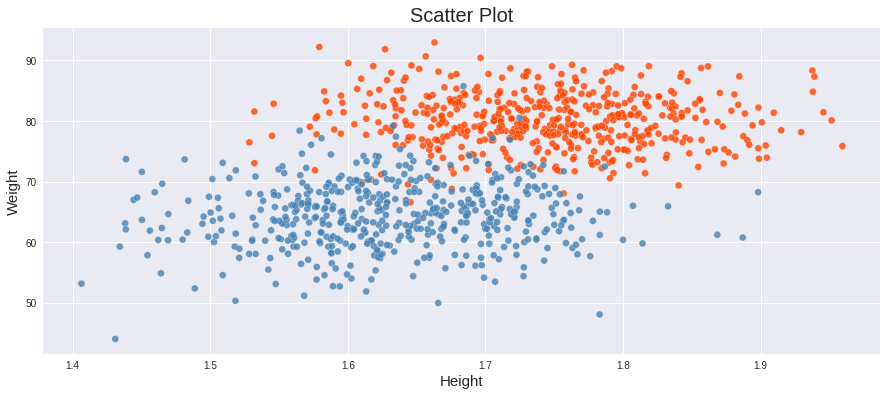

In [ ]:
colors = {'1':'steelblue', '0':'orangered'}

plt.scatter(dataset.height, dataset.weight, 
            c = dataset.female.map(colors), 
            alpha = 0.8,
            edgecolor = 'white')
plt.xlabel("Height", fontsize = 15)
plt.ylabel("Weight", fontsize = 15)
plt.title("Scatter Plot", fontsize = 20)

plt.show()

In the graph we identify two clear regions for female and not-female observations and a region in which we find observations of both categories. The problem we face now is the following: can we find a probabilitic model based on this data that may let us say is some other observation with the same known properties is female or not-female and be reasonably right? The model will be the Naïve Bayes and the goodness of the model are the different metrics.

The classifier will return a boundary that can be easily understood in the graph above: points found below the boundary will be classified as females, while point over it will be classified as not-females.

## <font color = "4587cd">  Performing the analysis </font>

Now, to perform the analysis we can follow two different strategies to validate our model:

 * **Holdout sets**, which means that out of the whole set, we select out one set of values to train the model, known as **training set**, and the rest is left for validation (or prediction) known as **test set**. Usually the split is 80%/20% for each set
 * **Cross-Validation**, which means that since using the split before may somehow be insuficient to have a good model, we create a sequence of fits using a k-fold of the set, for example, if we use a 80/20 split, we would perform 5 different fits and then the evaluation metrics we would have are the averages of the results of each of the fits.

### <font color = "red">  Holdout-Sets </font>

In order to find the model, let's split the dataset into train and test sets using the 80/20 rule, i.e. 80% of the set will go for the training and 20% for the test

In [ ]:
rand_state = np.random.RandomState(1)

x_train, x_test = train_test_split(dataset, 
                                   test_size = 0.20,
                                   random_state = rand_state)

To fin the model Python requires that we create the instance of the object that we are using, in this case it is a Gaussian Naïve Bayes model, then we write

In [ ]:
model = GaussianNB()

however, this is just and empty object in the sense that we have not given any variables to it. We can create a list with the different features that we will use

In [ ]:
features = ['height', 'weight']

Now we are ready to train the model, which is nothing more than fitting the model with the training set

In [ ]:
model.fit(x_train[features].values, 
          x_train['female'])

GaussianNB(priors=None, var_smoothing=1e-09)

Note that there is no specific output once we fit the model. We will see how to use this fit once we predict the output.

In [ ]:
model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

#### <font color = "red"> Predictions </font>

Once we have a fitted model, we can use the test set of make our predictions. See that as usual we are not very interested in knowning how goo our model performs with the same data set used to train it, but with any other new data set. 

The following piece of code finds the predictions for each of the observations in the test set whose properties are stored in the features list

In [ ]:
predictions = model.predict(x_test[features].values)

Just to have a visual inspection of our predictions and the expected values, we may put both in one single DataFrame

In [ ]:
expected = x_test['female']
output = pd.DataFrame({'Predictions': predictions,
                       'Expected': expected
        })
output.head(n = 10)

,Predictions,Expected
7,1,1
318,1,1
452,0,0
368,0,0
242,0,0
429,1,1
262,0,0
310,1,1
318,0,0
49,0,0


Later, we will see how to evaluate the output of the model.

### <font color = "red">  Cross-Validation </font>

In this case we are going to use 10 splits and we perform a `GridSearchCV` in order to idenfity the optimal parameters of the model.

In [ ]:
skf = StratifiedKFold(n_splits=10)
params = {}
gnb = GaussianNB()
gs = GridSearchCV(gnb, cv=skf, param_grid=params, return_train_score=True)

Now we can perform the split given the optimal hyperparameters and the we fit it

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features], dataset['female'])

gs.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

If you want you can use the `gs.cv_results_` to see the output of the fit

#### <font color = "red"> Predictions </font>

Now we can do the same as before in order to find the predictions of the model

In [ ]:
predictions = gs.predict(x_test[features].values)

expected = y_test
output = pd.DataFrame({'Predictions': predictions,
                       'Expected': expected
        })
output.head(n = 10)

,Predictions,Expected
356,1,1
77,1,1
125,0,0
84,1,1
231,0,0
425,1,1
459,1,1
173,0,0
256,0,0
302,0,1


## <font color = "4587cd">  Selecting the Model </font>

once we have estimated a model (even fit) we may wonder if the estimator is actually performing as we expect or if it is underperforming and, then, what to do.

The usual strategies involve:

 * Using a different model, more or less complicated
 * Using a different model, more or less flexible
 * Gather more training data
 * Gather more data to add more features

The right answer depends on the particular case but there are some general considerations:

 * A more complicated model will give worse results, since the model will keep on improving the train scores while underperform in the test set (**high-variance**). On the other hand, if we move towards a simpler model we may underperform in both sets (**high-bias**)
 * Adding more training samples may not improve the results

#### <font color = "red"> Validation Curve </font>

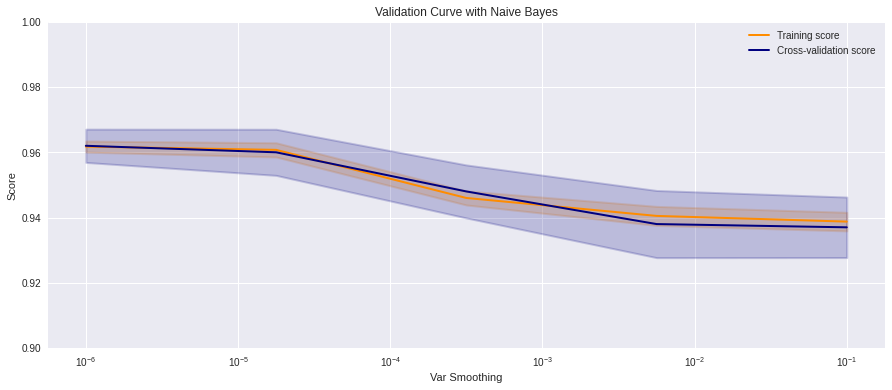

In [ ]:
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(model, 
                                             dataset[features], 
                                             dataset['female'], 
                                             n_jobs=4, 
                                             scoring="accuracy",
                                             param_range = param_range,
                                             param_name = 'var_smoothing')


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Naive Bayes")
plt.xlabel('Var Smoothing')
plt.ylabel("Score")
plt.ylim(0.9, 1.0)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

#### <font color = "red"> Learning Curve </font>

To find the learning curve we are going to use a cross-validation as follows

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model, 
                                                                      dataset[features], 
                                                                      dataset['female'], 
                                                                      cv = cv, 
                                                                      n_jobs = 4,
                                                                      train_sizes = np.linspace(.1, 1.0, 5),
                                                                      return_times = True)

once we have the validation curves for each of the splits, let's find the averages of the scores

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

We are now ready to plot the curve

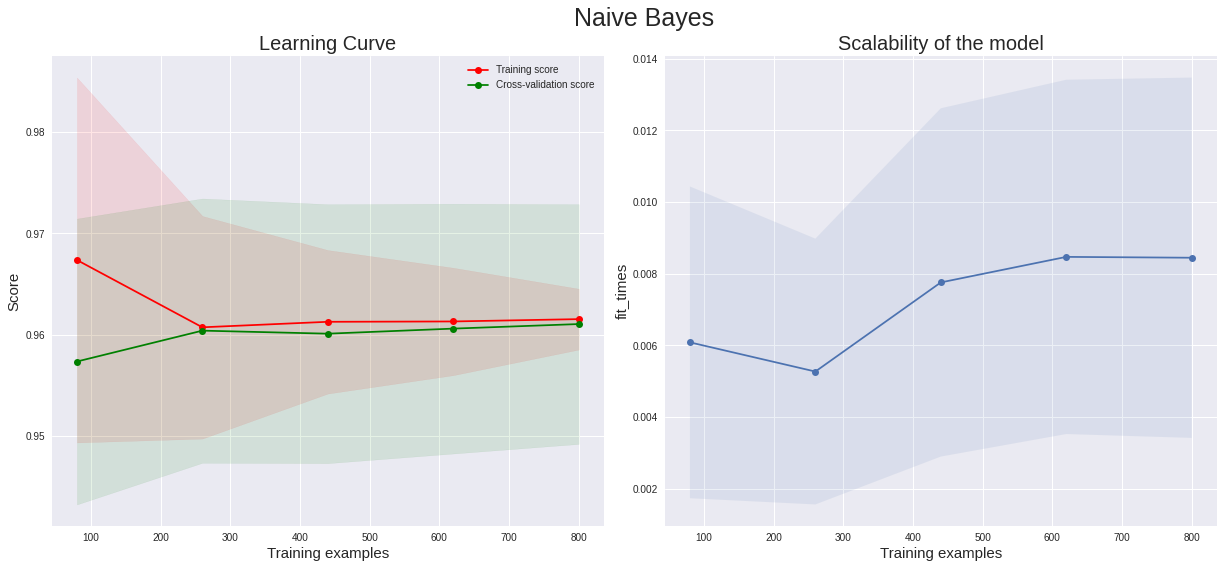

In [ ]:
plt.figure(figsize = (18,8))
plt.suptitle("Naive Bayes", fontsize = 25)

plt.subplot2grid((1,2), (0,0))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.xlabel("Training examples", fontsize = 15)
plt.ylabel("Score", fontsize = 15)
plt.title("Learning Curve", fontsize = 20)
plt.legend(loc="best")

plt.subplot2grid((1,2), (0,1))
plt.plot(train_sizes, fit_times_mean, 'o-')
plt.fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
plt.xlabel("Training examples", fontsize = 15)
plt.ylabel("fit_times", fontsize = 15)
plt.title("Scalability of the model", fontsize = 20)

plt.tight_layout(rect = (0,0,0.95,0.95))
plt.show()

In this case we see that the train and cross-validation learning curves converge too fast to a value that is not changing too much as we increase te size of our sample considerably, while the scalability is manifest. In this case it looks like we would not benefit too much from this increase.

## <font color = "4587cd"> Evaluation Metrics </font>

Once we have the predictions we find different metrics to evaluate the model. There are many possibilities but the most common are **Accuracy**, **Recall** and **Precision**, which have a nice relation with the type I and II errors in hypothesis testing. All of them are computed from the **Confusion Matrix**.

In the case of a **balanced** data we may directly go with the *accuracy*, and read directly the matrix. However, when we have an **imbalanced** dataset it is much better to go for the *recall* and *precision*.

### <font color = "red"> Application to Our Example </font>

Let's find the confustion matrix for our predictions. We are going to do it with the holdout-sets only and leave the cross-validation as an exercise (once we have found the predictions it is straightforward)

In [ ]:
print("Confusion Matrix: \n", metrics.confusion_matrix(expected, predictions))

Confusion Matrix: 
 [[ 94   2]
 [  3 101]]


however, the output of this function is not too clear. The following function (adapted from the one found in the documentation of scikit-learn) plots the confusion matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if not title:
        title = 'Confusion matrix'

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
 
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           xticklabels = classes, yticklabels=classes,
           title = title,
           ylabel = 'True label',
           xlabel = 'Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

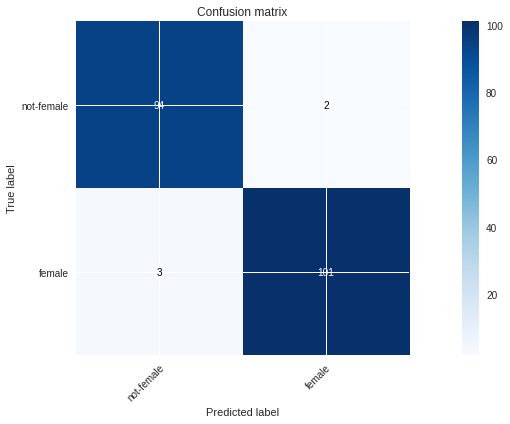

In [ ]:
class_names = np.array(['not-female', 'female'])
plot_confusion_matrix(expected, predictions, class_names)
plt.show()

In this confusion matrix we see that out of the 200 observations in the test set, only 3 of them are missclassified (in this example where the values where chosen by hand, makes perfect sense), now let's obtain the metrics from this confusion matrix

#### <font color = "red"> Precision </font>

The **Precision** is the ratio of the *true positives* in the *total predicted positives*. 

<br>
  
\begin{equation}
\text{precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
\end{equation}
  
<br>

In our case we go for the predicted females, then the true positives are those observations we predicted as females and are actuallly females: 101, while the total predicted positives are all the observations predicted as females: 101+2 = 103
  
\begin{equation}
\text{precision} = \frac{101}{103} = 0.9806
\end{equation}
  
  in the metrics module we find the **precision_score** function 

In [ ]:
print("Precision: ", metrics.precision_score(expected, predictions, pos_label = '1'))

Precission:  0.9805825242718447


see that we use the label 1, corresponding to females (we may use 0 and then this precision would be for not-females)


#### <font color = "red"> Recall </font>

The **Recall** is the ratio of *true positives* to the *total true positives*, 

<br>
  
\begin{equation}
\text{recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
\end{equation}
  
<br>  
  
then in our case we only need to know the total number of actual females in the sample: 101+3, then
  
\begin{equation}
\text{recall} = \frac{101}{104} = 0.9712
\end{equation}

  in the metrics module we find the **recall_score** function 

In [ ]:
print("Recall: ", metrics.recall_score(expected, predictions, pos_label = '1'))

Recall:  0.9711538461538461


To put words to our computations, let's give an interpretation of the metrics. We must think in different aspects of the constructions:

 * The true cases, in our case, this is just the females in our sample (total number of females)
 * The predicted cases, in our case which of the elements of the test set is marked as female once we use our model (total number of female predictions)

then, thinking on each of the predictions, they are marked as *female* or *not-female*, which may be, in turn, right or wrong. Then we must make a difference between:

 * If we have captured a lot of values and among them we find most of the true cases (high recall/low precision)
 * If we have captured few values but we are sure that most of them are true cases (low recall/high precision)

In the first case we have many false positives, while in the second we have many false negatives. Of course we want both as high as possible but this is not always possible.

#### <font color = "red"> ROC Curve </font>

A good way to evaluate the goodness of the estimation is trough the ROC curves (Receiver Operating Characteristics). Let's first plot them and then we interpret them. For the Precision-Recall curve we are going to use the `scikit-plot` modle which is not pre-installed in colab, so we must install it first 

In [ ]:
!pip install scikit-plot
import scikitplot as skplt

Let's now act as if we had not done the previous splits and model fits. We are going to estimate a new `GaussianNB` model together with the values of the estimated probabilities

In [ ]:
X = dataset[features].astype('float')
Y = dataset['female'].astype('float')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_gnb_score = gnb.predict_proba(X_test)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_test, Y_gnb_score[:, 1])

Now we can mke the plots

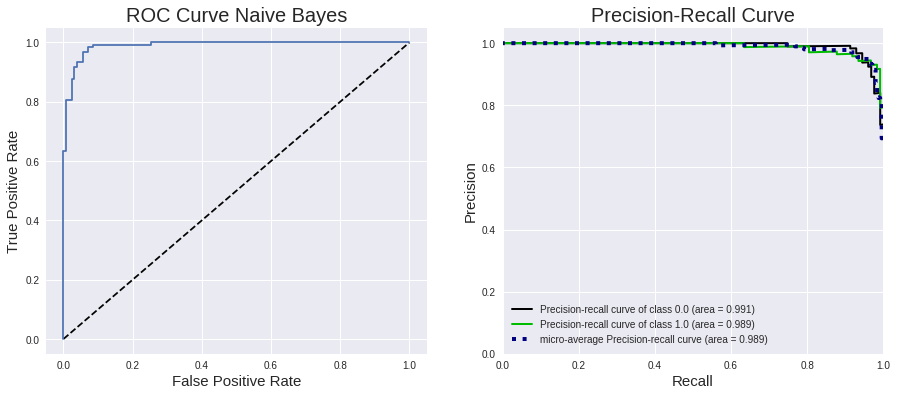

In [ ]:
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# First the ROC curve
ax1.plot([0,1],[0,1],'k--') 
ax1.plot(fpr_gnb, tpr_gnb) 
ax1.set_xlabel('False Positive Rate', fontsize = 15)
ax1.set_ylabel('True Positive Rate', fontsize = 15)
ax1.set_title('ROC Curve', fontsize = 20)

# Now the PR curve
skplt.metrics.plot_precision_recall(Y_test, Y_gnb_score, ax = ax2)
ax2.set_xlabel("Recall", fontsize = 15)
ax2.set_ylabel("Precision", fontsize = 15)
ax2.set_title("Precision-Recall Curve", fontsize = 20)

plt.show()

In the ROC curve we are mostly interested in the area below the curve What we need to know is the area under the ROC curve, which can be understood as the excess probability that our model classifies an observation as a true positive rather than as a false postive. In our case this is

In [ ]:
roc_auc_score(Y_test, Y_gnb_score[:, 1])

0.9893092631713718

On the other hand the precision-recall graph shows the trade-off between increasing one metric in front of the other

The general idea is that we use one or the other [according to](https://dl.acm.org/doi/10.1145/1143844.1143874)

 * **ROC curves** should be used when we have balanced data and so the number of observations is roughly the same in each class
 * **Precision-Recall** curves should be used when we have unbalanced data so the number of observations is different in each class


#### <font color = "red"> F-Score </font>

The **F-score** is the average of precision and recall, now, since they are ratios, the average is the harmonic mean, 

<br>

\begin{equation}
\text{F-score} = \frac{2}{1/\text{recall} + 1/\text{precision}}
\end{equation}

<br>

then we find
  
\begin{equation}
\text{F-score} = \frac{2}{1/0.9712 + 1/0.9806} = 0.9758
\end{equation}

 be careful with this quantity since it has some major problems:
 
   * it does not contain the negatives of the classification, and then it contains incomplete information
   * gives equal weight to precision and recall, which is not right since if precision is related to type I error and recall to type II, we know that depending on the situation we may go for one or the other but it is unlikely that both have the same weight in our conclusions.

In [ ]:
metrics.f1_score(expected, predictions, pos_label = '1')

0.9758454106280192

#### <font color = "red"> Accuracy </font>

The **Accuracy** is the ratio of *well-predicted* observations to the *total number* of observations, 

<br>

\begin{equation}
\text{accuracy} = \frac{\text{true positive} + \text{true negative}}{\text{sample size}}
\end{equation}

<br>

then in our case
  
\begin{equation}
\text{accuracy} = \frac{94 + 101}{200} = 0.975
\end{equation}
 
remember that the accuracy is a measure of the statistical bias, i.e. how close we are to the true value, then the definition makes sense since we compute the ratio of all the well-predicted in the test set

In [ ]:
print("Accuracy: ", metrics.accuracy_score(expected, predictions))

Accuracy:  0.975


## <font color = "4587cd"> When to Use Naïve Bayes </font>

It is clear that with our created dataset the results produce a very good model. We typically do not expect such a good output. In any case, Naïve Bayes is usually a good classifier when the sample size is small, for bigger samples it is better to use some other models as the **Support Vector Machines** which produce better results.

## <font color = "4587cd"> Extensions </font>

The model we have made is rather simple and contains only that case in which the independent variables are numeric and then we can use the Gaussian model for **all** of them. This is not always the case and we may want to use other factors as independent variables two, having a mixed model. In this case the approach in Python is not straightforward:

 * estimate the model using only the numerical variables with GaussianNB
 * estimate in parallell a model using only the factors with MultinomialNB
 * use the **predict_proba** function to transform all the dataset by taking the class assignment probabilities as new features: np.hstack((multinomial_probas, gaussian_probas)) 
 * refit a new model on the new features
 
there are other approaches but this may be the one that works better. 

Another possibility is using the module `mixed_naive_bayes`.